In [2]:
!pip install geocoder
!pip install folium
#!conda install -c conda-forge geocoder --yes
import geocoder
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium
print('Libraries imported.')

    100% |████████████████████████████████| 102kB 21.4MB/s a 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
    100% |████████████████████████████████| 92kB 20.2MB/s ta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
Libraries imported.


In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_0ae97d00e30a4fff9e5ab16dc988266f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kamx7RtYFIQ6NZIT0an_cNtE_Nv8xf5uatINbgOJ0yJ-',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0ae97d00e30a4fff9e5ab16dc988266f.get_object(Bucket='finalprojectcoursera-donotdelete-pr-eh70rveuqbuzrn',Key='2017_densitat.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataf = pd.read_csv(body)
dataf.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Superfície (ha),Superfície Residencial (ha),Densitat (hab/ha),Densitat neta (hab/ha)
0,2017,1,Ciutat Vella,1,el Raval,47608,109.8,49.7,433,959
1,2017,1,Ciutat Vella,2,el Barri Gòtic,16062,84.2,34.1,191,471
2,2017,1,Ciutat Vella,3,la Barceloneta,14996,131.4,13.5,114,1107
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22721,111.4,32.5,204,700
4,2017,2,Eixample,5,el Fort Pienc,32016,92.9,33.4,345,959


In [4]:
dataf.columns = ['Year','District_Code','District_Name','Neig_Code','Neighborhood','Population','Surface','Res','Poblation_Density','Net']
dataf.drop(['Year', 'District_Code', 'District_Name','Population','Surface','Res','Net'], axis=1, inplace=True)
dataf['Postal_Code'] = ['08001'
    ,'08002'
    ,'08003'
    ,'08003'
    ,'08013'
    ,'08025'
    ,'08009'
    ,'08036'
    ,'08029'
    ,'08015'
    ,'08004'
    ,'08040'
    ,'08038'
    ,'08004'
    ,'08014'
    ,'08014'
    ,'08014'
    ,'08014'
    ,'08028'
    ,'08020'
    ,'08034'
    ,'08017'
    ,'08034'
    ,'08017'
    ,'08022'
    ,'08006'
    ,'08023'
    ,'08023'
    ,'08023'
    ,'08024'
    ,'08012'
    ,'08025'
    ,'08032'
    ,'08033'
    ,'08041'
    ,'08032'
    ,'08032'
    ,'08035'
    ,'08035'
    ,'08035'
    ,'08035'
    ,'08035'
    ,'08035'
    ,'08031'
    ,'08016'
    ,'08031'
    ,'08031'
    ,'08042'
    ,'08033'
    ,'08030'
    ,'08016'
    ,'08016'
    ,'08033'
    ,'08033'
    ,'08033'
    ,'08033'
    ,'08033'
    ,'08030'
    ,'08030'
    ,'08030'
    ,'08027'
    ,'08031'
    ,'08027'
    ,'08027'
    ,'08026'
    ,'08005'
    ,'08005'
    ,'08005'
    ,'08019'
    ,'08019'
    ,'08019'
    ,'08018'
    ,'08020']
dataf.head()

,Neig_Code,Neighborhood,Poblation_Density,Postal_Code
0,1,el Raval,433,08001
1,2,el Barri Gòtic,191,08002
2,3,la Barceloneta,114,08003
3,4,"Sant Pere, Santa Caterina i la Ribera",204,08003
4,5,el Fort Pienc,345,08013


In [5]:
latitude=[]
longitude=[]
for i in range(dataf.shape[0]):
    code = dataf.loc[i].at['Postal_Code']
    neigh = dataf.loc[i].at['Neighborhood']
    address='{},{}, Barcelona, Cataluña'.format(code,neigh)
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis(address)
        lat_lng_coords= g.latlng
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])

In [6]:
dataf['Latitude']=latitude
dataf['Longitude']=longitude
dataf

,Neig_Code,Neighborhood,Poblation_Density,Postal_Code,Latitude,Longitude
0,1,el Raval,433,08001,41.379673,2.169027
1,2,el Barri Gòtic,191,08002,41.381812,2.176201
2,3,la Barceloneta,114,08003,41.381132,2.190669
3,4,"Sant Pere, Santa Caterina i la Ribera",204,08003,41.386169,2.183101
4,5,el Fort Pienc,345,08013,41.398863,2.180921
5,6,la Sagrada Família,490,08025,41.407545,2.174160
6,7,la Dreta de l'Eixample,207,08009,41.395429,2.170129
7,8,l'Antiga Esquerra de l'Eixample,343,08036,41.390821,2.151859
8,9,la Nova Esquerra de l'Eixample,435,08029,41.385566,2.146261
9,10,Sant Antoni,479,08015,41.376981,2.158198


In [7]:
address = 'Barcelona, Cataluña'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latbcn = location.latitude
longbcn = location.longitude
print('The geograpical coordinate of Barcelona are {}, {}.'.format(latbcn, longbcn))

The geograpical coordinate of Barcelona are 41.3828939, 2.1774322.


In [8]:
map_barcelona = folium.Map(location=[latbcn, longbcn], zoom_start=12)

for lat, lng, neighborhood in zip(dataf['Latitude'], dataf['Longitude'], dataf['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_barcelona)  
    
map_barcelona

In [9]:
# @hidden_cell
CLIENT_ID = 'AD1LAHWWBDJQMZG3IZ2RTWMAJQ2GEX4L2OCNVQ14ILWBIDEI' # your Foursquare ID
CLIENT_SECRET = 'HQODXUSWOP3HG3ZFG5LMFWO4LXWYYZHVKQ3URB0R43SEYVVS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    limit=100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
barcelona_venues = getNearbyVenues(names=dataf['Neighborhood'],
                                   latitudes=dataf['Latitude'],
                                   longitudes=dataf['Longitude']
                                  )

el Raval
el Barri Gòtic
la Barceloneta
Sant Pere, Santa Caterina i la Ribera
el Fort Pienc
la Sagrada Família
la Dreta de l'Eixample
l'Antiga Esquerra de l'Eixample
la Nova Esquerra de l'Eixample
Sant Antoni
el Poble Sec
la Marina del Prat Vermell
la Marina de Port
la Font de la Guatlla
Hostafrancs
la Bordeta
Sants - Badal
Sants
les Corts
la Maternitat i Sant Ramon
Pedralbes
Vallvidrera, el Tibidabo i les Planes
Sarrià
les Tres Torres
Sant Gervasi - la Bonanova
Sant Gervasi - Galvany
el Putxet i el Farró
Vallcarca i els Penitents
el Coll
la Salut
la Vila de Gràcia
el Camp d'en Grassot i Gràcia Nova
el Baix Guinardó
Can Baró
el Guinardó
la Font d'en Fargues
el Carmel
la Teixonera
Sant Genís dels Agudells
Montbau
la Vall d'Hebron
la Clota
Horta
Vilapicina i la Torre Llobeta
Porta
el Turó de la Peira
Can Peguera
la Guineueta
Canyelles
les Roquetes
Verdun
la Prosperitat
la Trinitat Nova
Torre Baró
Ciutat Meridiana
Vallbona
la Trinitat Vella
Baró de Viver
el Bon Pastor
Sant Andreu
la Sagrer

In [15]:
print(barcelona_venues.shape)

(5005, 7)


In [16]:
barcelona_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,el Raval,41.379673,2.169027,Filmoteca de Catalunya,41.378540,2.171101,Movie Theater
1,el Raval,41.379673,2.169027,La Monroe,41.378795,2.170692,Spanish Restaurant
2,el Raval,41.379673,2.169027,A Tu Bola,41.380096,2.169054,Tapas Restaurant
3,el Raval,41.379673,2.169027,La Robadora,41.379500,2.170463,Gastropub
4,el Raval,41.379673,2.169027,33/45,41.381059,2.167399,Cocktail Bar


In [17]:
barcelona_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Baró de Viver,61,61,61,61,61,61
Can Baró,38,38,38,38,38,38
Can Peguera,69,69,69,69,69,69
Canyelles,8,8,8,8,8,8
Ciutat Meridiana,9,9,9,9,9,9
Diagonal Mar i el Front Marítim del Poblenou,100,100,100,100,100,100
Horta,20,20,20,20,20,20
Hostafrancs,100,100,100,100,100,100
Montbau,32,32,32,32,32,32


In [18]:
print('There are {} uniques categories.'.format(len(barcelona_venues['Venue Category'].unique())))

There are 291 uniques categories.


In [19]:
barcelona_onehot = pd.get_dummies(barcelona_venues[['Venue Category']], prefix="", prefix_sep="")
barcelona_onehot['Neighborhood'] = barcelona_venues['Neighborhood'] 

fixed_columns = [barcelona_onehot.columns[-1]] + list(barcelona_onehot.columns[:-1])
barcelona_onehot = barcelona_onehot[fixed_columns]

barcelona_onehot.head()

,Yoga Studio,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Neighborhood,Nightclub,Noodle House,Nudist Beach,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,

In [20]:
barcelona_onehot.shape

(5005, 291)

In [21]:
barcelona_grouped = barcelona_onehot.groupby('Neighborhood').mean().reset_index()
barcelona_grouped

,Neighborhood,Yoga Studio,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Nightclub,Noodle House,Nudist Beach,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,

In [22]:
barcelona_grouped.shape

(73, 291)

In [23]:
num_top_venues = 5

for hood in barcelona_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = barcelona_grouped[barcelona_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baró de Viver----
                venue  freq
0      Clothing Store  0.08
1        Burger Joint  0.07
2  Italian Restaurant  0.05
3      Sandwich Place  0.05
4         Supermarket  0.05


----Can Baró----
                venue  freq
0               Plaza  0.11
1       Grocery Store  0.11
2  Spanish Restaurant  0.11
3                Café  0.08
4  Chinese Restaurant  0.05


----Can Peguera----
                venue  freq
0    Tapas Restaurant  0.12
1         Supermarket  0.07
2       Grocery Store  0.07
3         Pizza Place  0.06
4  Spanish Restaurant  0.04


----Canyelles----
           venue  freq
0   Soccer Field  0.25
1          Plaza  0.12
2           Café  0.12
3         Market  0.12
4  Metro Station  0.12


----Ciutat Meridiana----
           venue  freq
0           Park  0.22
1  Metro Station  0.22
2  Grocery Store  0.11
3           Café  0.11
4    Supermarket  0.11


----Diagonal Mar i el Front Marítim del Poblenou----
                      venue  freq
0                    

                      venue  freq
0        Spanish Restaurant  0.08
1                      Café  0.06
2               Coffee Shop  0.05
3                     Hotel  0.05
4  Mediterranean Restaurant  0.04


----el Poble Sec----
                      venue  freq
0          Tapas Restaurant  0.16
1              Cocktail Bar  0.06
2                       Bar  0.06
3  Mediterranean Restaurant  0.05
4                      Café  0.05


----el Poblenou----
                      venue  freq
0  Mediterranean Restaurant  0.08
1                Restaurant  0.08
2        Spanish Restaurant  0.05
3                    Bakery  0.04
4               Pizza Place  0.03


----el Putxet i el Farró----
                venue  freq
0              Bakery  0.10
1                Café  0.06
2               Hotel  0.06
3       Grocery Store  0.05
4  Italian Restaurant  0.05


----el Raval----
                venue  freq
0    Tapas Restaurant  0.09
1  Spanish Restaurant  0.07
2                 Bar  0.07
3        Cock

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = barcelona_grouped['Neighborhood']

for ind in np.arange(barcelona_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(barcelona_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baró de Viver,Clothing Store,Burger Joint,Italian Restaurant,Sandwich Place,Supermarket,Chinese Restaurant,Spanish Restaurant,American Restaurant,Ice Cream Shop,Tapas Restaurant
1,Can Baró,Grocery Store,Plaza,Spanish Restaurant,Café,Soccer Field,Dessert Shop,Chinese Restaurant,Tapas Restaurant,Restaurant,Bar
2,Can Peguera,Tapas Restaurant,Grocery Store,Supermarket,Pizza Place,Spanish Restaurant,Plaza,Sandwich Place,Breakfast Spot,Seafood Restaurant,Restaurant
3,Canyelles,Soccer Field,Market,Mediterranean Restaurant,Skate Park,Café,Plaza,Metro Station,Flea Market,Fish Market,Fish & Chips Shop
4,Ciutat Meridiana,Metro Station,Park,Café,Mediterranean Restaurant,Supermarket,Train Station,Grocery Store,Falafel Restaurant,Electronics Store,Empanada Restaurant


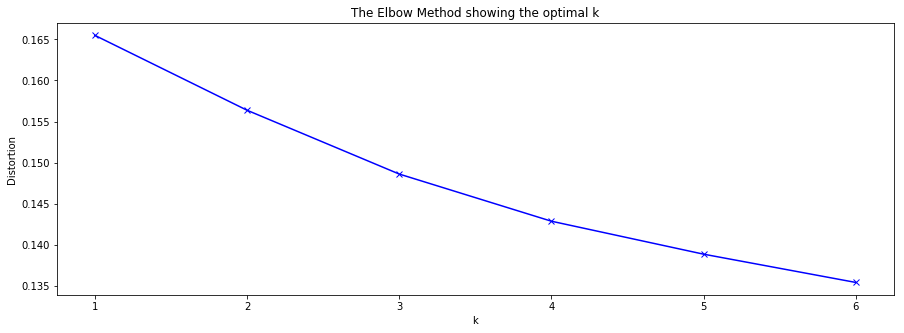

In [30]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

distortions = []
barcelona_grouped_clustering = barcelona_grouped.drop('Neighborhood', 1)
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(barcelona_grouped_clustering)
    distortions.append(sum(np.min(cdist(barcelona_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / barcelona_grouped_clustering.shape[0])

# Plot the elbow
plt.figure(figsize=(15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [33]:
barcelona_grouped_clustering.head()

,Yoga Studio,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Nightclub,Noodle House,Nudist Beach,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,University,Ve

In [31]:
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(barcelona_grouped_clustering)

kmeans.labels_[0:10]

array([1, 1, 1, 2, 3, 0, 2, 0, 2, 1], dtype=int32)

In [32]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

barcelona_merged = dataf

barcelona_merged = barcelona_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how='right')

barcelona_merged.head()

,Neig_Code,Neighborhood,Poblation_Density,Postal_Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,el Raval,433,08001,41.379673,2.169027,0,Tapas Restaurant,Bar,Spanish Restaurant,Cocktail Bar,Restaurant,Mediterranean Restaurant,Pizza Place,Hotel,Beer Bar,Theater
1,2,el Barri Gòtic,191,08002,41.381812,2.176201,0,Tapas Restaurant,Plaza,Spanish Restaurant,Cocktail Bar,Bar,Hotel,Italian Restaurant,Ice Cream Shop,Coffee Shop,Dessert Shop
2,3,la Barceloneta,114,08003,41.381132,2.190669,0,Tapas Restaurant,Mediterranean Restaurant,Paella Restaurant,Bar,Ice Cream Shop,Burger Joint,Restaurant,Seafood Restaurant,Pizza Place,Wine Bar
3,4,"Sant Pere, Santa Caterina i la Ribera",204,08003,41.386169,2.183101,0,Tapas Restaurant,Bar,Cocktail Bar,Wine Bar,Hotel,Dessert Shop,Café,Spanish Restaurant,Italian Restaurant,Restaurant
4,5,el Fort Pienc,345,08013,41.398863,2.180921,0,Restaurant,Spanish Restaurant,Coffee Shop,Hotel,Theater,Café,Burger Joint,Plaza,Mexican Restaurant,Mediterranean Restaurant


In [110]:
barcelona_merged.groupby(['Cluster Labels','1st Most Common Venue']).count().reset_index().sort_values(['Cluster Labels','Neig_Code'],ascending=[True,False])

,Cluster Labels,1st Most Common Venue,Neig_Code,Neighborhood,Poblation_Density,Postal_Code,Latitude,Longitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,0,Tapas Restaurant,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
0,0,Bakery,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,0,Hotel,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,0,Mediterranean Restaurant,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
9,0,Spanish Restaurant,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
8,0,Restaurant,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,0,Bar,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,Clothing Store,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,Garden,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,Italian Restaurant,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [111]:
# create map
map_clusters = folium.Map(location=[latbcn, longbcn], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(barcelona_merged['Latitude'], barcelona_merged['Longitude'], barcelona_merged['Neighborhood'], barcelona_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [127]:
# create map
map_clusters = folium.Map(location=[latbcn, longbcn], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(barcelona_merged['Latitude'], barcelona_merged['Longitude'], barcelona_merged['Neighborhood'], barcelona_merged['Cluster Labels']):
    if cluster==2 or cluster==3:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [145]:
barcelona_merged[barcelona_merged['Cluster Labels']==2].sort_values('Poblation_Density',ascending=False)

,Neig_Code,Neighborhood,Poblation_Density,Postal_Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,43,Horta,87,08035,41.440922,2.151747,2,Soccer Field,Spanish Restaurant,Bakery,Diner,Soccer Stadium,Metro Station,Stadium,Scenic Lookout,Sandwich Place,Garden
48,49,Canyelles,87,08033,41.446174,2.162869,2,Soccer Field,Market,Mediterranean Restaurant,Skate Park,Café,Plaza,Metro Station,Flea Market,Fish Market,Fish & Chips Shop
40,41,la Vall d'Hebron,79,08035,41.431055,2.148429,2,Soccer Field,Park,Spanish Restaurant,Coffee Shop,Plaza,Hotel,Gym,Restaurant,Hostel,Chinese Restaurant
39,40,Montbau,25,08035,41.433378,2.141688,2,Restaurant,Gym,Park,Soccer Field,Breakfast Spot,Bakery,Coffee Shop,Plaza,Tennis Court,Spanish Restaurant


In [144]:
barcelona_merged[barcelona_merged['Cluster Labels']==3].sort_values('Poblation_Density',ascending=False)

,Neig_Code,Neighborhood,Poblation_Density,Postal_Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,55,Ciutat Meridiana,291,08033,41.460682,2.176591,3,Metro Station,Park,Café,Mediterranean Restaurant,Supermarket,Train Station,Grocery Store,Falafel Restaurant,Electronics Store,Empanada Restaurant
56,57,la Trinitat Vella,123,08033,41.450873,2.192618,3,Park,Metro Station,Soccer Field,Spanish Restaurant,Tapas Restaurant,Plaza,Track Stadium,Breakfast Spot,Supermarket,Falafel Restaurant
55,56,Vallbona,23,08033,41.464073,2.183339,3,Metro Station,BBQ Joint,Grocery Store,Tapas Restaurant,Cupcake Shop,Park,Train Station,Furniture / Home Store,Empanada Restaurant,Ethiopian Restaurant
53,54,Torre Baró,16,08033,41.455001,2.177866,3,Park,Metro Station,Music Venue,Train Station,Grocery Store,Spanish Restaurant,Plaza,Farmers Market,Ethiopian Restaurant,Convenience Store


In [146]:
barcelona_merged['Poblation_Density'].mean()

249.87671232876713